### Importing Data and Packages

In [1]:
# imports
import numpy as np
import pandas as pd 
import nltk
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing fake news data 
fake_data = pd.read_csv("./Fake.csv")
fake_data

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [3]:
# importig real news data
true_data = pd.read_csv("./True.csv")
true_data

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [4]:
# labeling real news (0) and fake news (1) 
fake_data["Fake"] = 1 
true_data["Fake"] = 0 

# merging the two data sets
data = pd.concat([true_data, fake_data])

# resetting index of the data frame
data.reset_index(inplace=True)

# removing index column of the frame
data = data[list(data.columns)[1:]]

# displaying data 
data

,title,text,subject,date,Fake
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0
...,...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",1
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",1
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",1
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",1


### Sentiment Analysis on the Titles / Body Text

In [5]:
# importing pakcage for sentiment analysis
from nltk.sentiment import SentimentIntensityAnalyzer

# initializing features to zero 
data[["title sa neg", "title sa pos", "title sa neu", "title sa comp"]] = 0 

# performing title sentiment analysis for each instance
for i in range(len(data)): 
    sa = SentimentIntensityAnalyzer().polarity_scores(data["title"].iloc[i])
    data["title sa neg"].iloc[i] = sa["neg"]
    data["title sa pos"].iloc[i] = sa["pos"]
    data["title sa neu"].iloc[i] = sa["neu"]
    data["title sa comp"].iloc[i] = sa["compound"]
    
# displaying data
data

,title,text,subject,date,Fake,title sa neg,title sa pos,title sa neu,title sa comp
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0,0.344,0.000,0.656,-0.4939
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0,0.000,0.245,0.755,0.3818
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0,0.000,0.000,1.000,0.0000
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0,0.000,0.000,1.000,0.0000
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0,0.000,0.165,0.835,0.2449
...,...,...,...,...,...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",1,0.268,0.152,0.580,-0.3818
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",1,0.000,0.273,0.727,0.6289
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",1,0.000,0.000,1.000,0.0000
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",1,0.000,0.000,1.000,0.0000


In [43]:
# initializing features to zero 
data[["text sa neg", "text sa pos", "text sa neu", "text sa comp"]] = 0 

# performing text sentiment analysis for each instance
for i in range(len(data)): 
    sa = SentimentIntensityAnalyzer().polarity_scores(data["text"].iloc[i])
    data["text sa neg"].iloc[i] = sa["neg"]
    data["text sa pos"].iloc[i] = sa["pos"]
    data["text sa neu"].iloc[i] = sa["neu"]
    data["text sa comp"].iloc[i] = sa["compound"]
    
# displaying data
data

,title,text,subject,date,Fake,title sa neg,title sa pos,title sa neu,title sa comp,text sa neg,text sa pos,text sa neu,text sa comp
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0,0.344,0.000,0.656,-0.4939,0.049,0.089,0.862,0.9857
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0,0.000,0.245,0.755,0.3818,0.085,0.092,0.824,-0.0547
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0,0.000,0.000,1.000,0.0000,0.050,0.044,0.906,-0.6808
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0,0.000,0.000,1.000,0.0000,0.067,0.059,0.874,-0.2201
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0,0.000,0.165,0.835,0.2449,0.045,0.061,0.893,0.5896
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",1,0.268,0.152,0.580,-0.3818,0.102,0.111,0.787,0.7675
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",1,0.000,0.273,0.727,0.6289,0.054,0.093,0.853,0.9429
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",1,0.000,0.000,1.000,0.0000,0.130,0.103,0.767,-0.9994
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",1,0.000,0.000,1.000,0.0000,0.081,0.085,0.834,0.4589


(array([1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        5.0000e+00, 2.1800e+02, 4.7910e+03, 1.3147e+04, 3.2550e+03]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

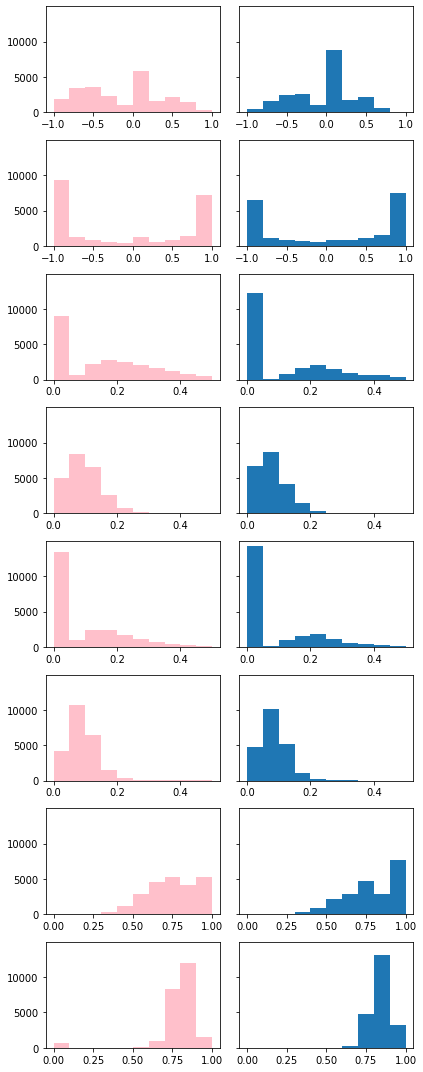

In [131]:
import matplotlib.pyplot as plt

# comp data
fake_sa_text = data[data.Fake == 1]["text sa comp"].to_numpy()
real_sa_text = data[data.Fake == 0]["text sa comp"].to_numpy()

fake_sa_title = data[data.Fake == 1]["title sa comp"].to_numpy()
real_sa_title = data[data.Fake == 0]["title sa comp"].to_numpy()

# neg data
fake_sa_text_neg = data[data.Fake == 1]["text sa neg"].to_numpy()
real_sa_text_neg = data[data.Fake == 0]["text sa neg"].to_numpy()

fake_sa_title_neg = data[data.Fake == 1]["title sa neg"].to_numpy()
real_sa_title_neg = data[data.Fake == 0]["title sa neg"].to_numpy()

# pos data
fake_sa_text_pos = data[data.Fake == 1]["text sa pos"].to_numpy()
real_sa_text_pos = data[data.Fake == 0]["text sa pos"].to_numpy()

fake_sa_title_pos = data[data.Fake == 1]["title sa pos"].to_numpy()
real_sa_title_pos = data[data.Fake == 0]["title sa pos"].to_numpy()

# neu data
fake_sa_text_neu = data[data.Fake == 1]["text sa neu"].to_numpy()
real_sa_text_neu = data[data.Fake == 0]["text sa neu"].to_numpy()

fake_sa_title_neu = data[data.Fake == 1]["title sa neu"].to_numpy()
real_sa_title_neu = data[data.Fake == 0]["title sa neu"].to_numpy()


# adjusting display size
plt.rcParams["figure.figsize"] = (6,15)

# setting figure parameters
fig, axs = plt.subplots(8, 2, sharey=True, tight_layout=True)

# compopund Sentiment Analysis 
axs[0, 0].hist(fake_sa_title, range=(-1,1), color = "pink")
axs[0, 1].hist(real_sa_title, range=(-1,1))
axs[1, 0].hist(fake_sa_text, range=(-1,1), color = "pink")
axs[1, 1].hist(real_sa_text, range=(-1,1))

# negative Sentiment Analysis
axs[2, 0].hist(fake_sa_title_neg, range=(0,0.5), color = "pink")
axs[2, 1].hist(real_sa_title_neg, range=(0,0.5))
axs[3, 0].hist(fake_sa_text_neg, range=(0,0.5), color = "pink")
axs[3, 1].hist(real_sa_text_neg, range=(0,0.5))

# positive Sentiment Analysis
axs[4, 0].hist(fake_sa_title_pos, range=(0,0.5), color = "pink")
axs[4, 1].hist(real_sa_title_pos, range=(0,0.5))
axs[5, 0].hist(fake_sa_text_pos, range=(0,0.5), color = "pink")
axs[5, 1].hist(real_sa_text_pos, range=(0,0.5))

# neutral Sentiment Analysis
axs[6, 0].hist(fake_sa_title_neu, range=(0,1), color = "pink")
axs[6, 1].hist(real_sa_title_neu, range=(0,1))
axs[7, 0].hist(fake_sa_text_neu, range=(0,1), color = "pink")
axs[7, 1].hist(real_sa_text_neu, range=(0,1))


In [4]:
# backing up data into a csv file 
data.to_csv("v2.csv")

### Train Test Data Split

In [10]:
from sklearn.model_selection import train_test_split

data = pd.read_csv("./v1.csv", index_col=0)

# getting list of feature names
features = list(data.columns)

# feature data
X = data[features]

# labels 
y = data["Fake"]

# splitting data (75% training)
train_data, test_data, y_train, y_test = train_test_split(X, y, random_state=0)

### TF-IDF Analysis

In [12]:
# importing package for tf/idf vectorizaiton
from sklearn.feature_extraction.text import TfidfVectorizer

stopwords = nltk.corpus.stopwords.words('english')

# defining title corpus 
title_corpus = train_data["title"].to_numpy()
  
# defining text corpus 
text_corpus = train_data["text"].to_numpy()

# vectorizer objects
vec_title = TfidfVectorizer(stop_words=stopwords, max_features=2000)
vec_text = TfidfVectorizer(stop_words=stopwords, max_features=2000)

# fitting the titles to a vector using training data
title_matrix_train = vec_title.fit_transform(title_corpus)
title_feature_names = list(vec_title.get_feature_names_out())

# fitting the text to a vector
text_matrix_train = vec_text.fit_transform(text_corpus)
text_feature_names = list(vec_text.get_feature_names_out())

# modifying feature names (to distinguish between title and text)
for i in range(len(title_feature_names)):
    title_feature_names[i] = "title: " + title_feature_names[i]
for i in range(len(text_feature_names)):
    text_feature_names[i] = "text: " + text_feature_names[i]

# adding all features to the training dataframe
train_data[title_feature_names] = title_matrix_train.todense()
train_data[text_feature_names] = title_matrix_train.todense()

# transforming the titles to a vector using testing data
title_matrix_test = vec_title.transform(test_data["title"].to_numpy())
text_matrix_test = vec_title.transform(test_data["text"].to_numpy())

# adding all features to the testing dataframe
test_data[title_feature_names] = title_matrix_test.todense()
test_data[text_feature_names] = title_matrix_test.todense()


In [46]:
# saving feature extraction in csv files
test_data.to_csv("test_data.csv")
train_data.to_csv("train_data.csv")

In [17]:
# getting the top 20 highest weighted terms for title

# creating a dataframe for title features
text_feature_weights = pd.DataFrame()

# getting a list of feature importance values
text_f_weights = list(vec_text.idf_)

# list of feature names 
text_f_names = list(vec_text.get_feature_names())

# adding to dataframe 
text_feature_weights["feature"] = text_f_names
text_feature_weights["weight"] = text_f_weights

# sorting features by feature weight
text_feature_weights = text_feature_weights.sort_values(by="weight", ascending=False)

# top 20 highest weighted features
text_feature_weights.iloc[:20]

,feature,weight
1433,quot,10.325869
965,js,6.620460
813,hariri,6.440875
712,flint,6.324615
1779,taiwan,6.012835
325,catalan,5.999531
1341,pope,5.969160
491,cuban,5.895052
326,catalonia,5.879304
361,christie,5.852327


In [18]:
# getting the top 20 highest weighted terms for title

# creating a dataframe for title features
title_feature_weights = pd.DataFrame()

# getting a list of feature importance values
title_f_weights = list(vec_title.idf_)

# list of feature names 
title_f_names = list(vec_title.get_feature_names())

# adding to dataframe 
title_feature_weights["feature"] = title_f_names
title_feature_weights["weight"] = title_f_weights

# sorting features by feature weight
title_feature_weights = title_feature_weights.sort_values(by="weight", ascending=False)

# top 20 highest weighted features
title_feature_weights.iloc[:20]


,feature,weight
806,hat,8.057185
707,founder,8.057185
992,known,8.023284
698,football,8.023284
824,hey,8.023284
364,club,8.023284
665,ferguson,8.023284
224,blocking,7.990494
998,kurdistan,7.990494
757,goldman,7.990494


In [38]:
# Is there any overlap between the top 20 highest weighted terms in title and text? 
[term for term in title_feature_weights["feature"] if term in text_feature_weights["feature"]]

[]

In [39]:
# How many terms are shared in total between the title and text features? 
len([term for term in vec_title.get_feature_names() if term in vec_text.get_feature_names()])

1381

In [23]:
# formatting testing and training data 

features = list(train_data.columns)
features = features[5:]
features

X_train = train_data[features]
X_test = test_data[features]

### Model Testing Code

In [24]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# function for analyzing performance of model on binary classifier 
def binary_classifier_model_analysis(x, y, model): 

    pred = model.predict(x)
    TP, TN, FP, FN = [0, 0, 0, 0]
    
    for i in range(len(x)): 
        if y[i] == 1: 
            if pred[i] > 0.5: 
                TP += 1 
            else: 
                FN += 1 
        else:
            if pred[i] > 0.5: 
                FP += 1 
            else: 
                TN += 1 

    accuracy = (TP + TN) / len(x)
    error =  1 - accuracy
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    f1 = 2*precision * recall / (precision + recall)
    
    cm = confusion_matrix(y, pred, labels=[0, 1])
     
    return [accuracy, error, precision, recall, f1, cm]


# function for printing the results of binary classiffier analysis
def binary_classifier_model_analysis_print(x, y, model):
    
    results = binary_classifier_model_analysis(x, y, model)
    print("\tAccuracy: " + str(results[0]))
    print("\tError: " + str(results[1]))
    print("\tPrecision: " + str(results[2]))
    print("\tRecall: " + str(results[3]))
    print("\tF1 score: " + str(results[4]))
    
    RocCurveDisplay.from_estimator(model, x, y)
    disp = ConfusionMatrixDisplay(confusion_matrix=results[5], display_labels=[0,1])
    disp.plot()

    plt.show()
    

### Naive Bayes Model


Naive Bayes on Training Data
	Accuracy: 0.8954949068987023
	Error: 0.10450509310129774
	Precision: 0.9424645501317606
	Recall: 0.8523520399477955
	F1 score: 0.89514615178332


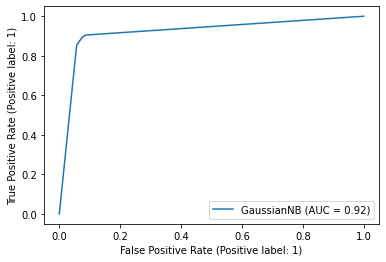

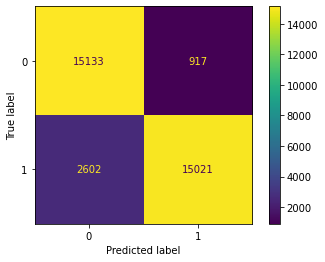


Naive Bayes on Testing Data
	Accuracy: 0.8841870824053452
	Error: 0.11581291759465484
	Precision: 0.9301623254058136
	Recall: 0.8412427449641516
	F1 score: 0.8834707780566512


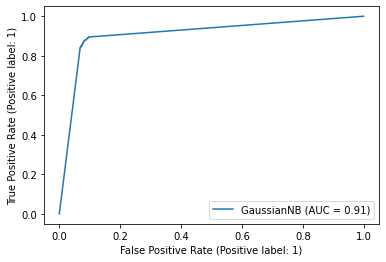

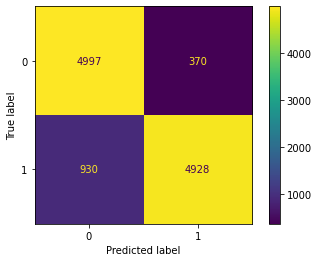

In [25]:
from sklearn.naive_bayes import GaussianNB

# NB model object 
model = GaussianNB()

# training the NB model
model.fit(X_train, y_train)

# Analyzing Model on Training Data
print("\nNaive Bayes on Training Data")
binary_classifier_model_analysis_print(X_train.to_numpy(), y_train.to_numpy(), model)

# Analyzing Model on Testing Data
print("\nNaive Bayes on Testing Data")
binary_classifier_model_analysis_print(X_test.to_numpy(), y_test.to_numpy(), model)

### KNN Model

In [26]:
# imports for KNN and CV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Cross Validation for KNN 
k_values = [2, 4, 6, 8, 10, 20, 30]
best_score = float("-inf")
best_k = -1
for k in k_values: 
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    score = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy').mean()

    # Show CV error for each value of k
    print("k: ", k)
    print("\tCross Validation Score: ", score)
    print("\n")

    if score > best_score:
        best_k = k
        best_score = score

k:  2
	Cross Validation Score:  0.6388201878179606


k:  4
	Cross Validation Score:  0.6850893723944949


k:  6
	Cross Validation Score:  0.7493541290868684


k:  8
	Cross Validation Score:  0.7671128859102133


k:  10
	Cross Validation Score:  0.7925042108115605


k:  20
	Cross Validation Score:  0.8674604049214294


k:  30
	Cross Validation Score:  0.8840316412254051





KNN on Training Data
	Accuracy: 0.8981973688118077
	Error: 0.10180263118819233
	Precision: 0.9211916206753309
	Recall: 0.8808375418487204
	F1 score: 0.900562742936706


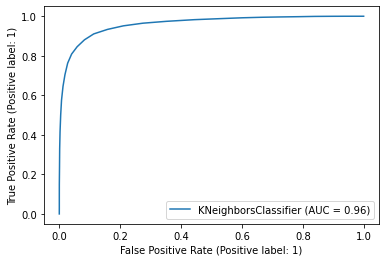

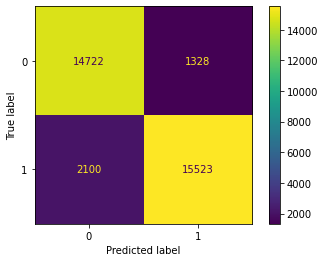


KNN on Testing Data
	Accuracy: 0.8874832962138085
	Error: 0.1125167037861915
	Precision: 0.9115171054988358
	Recall: 0.8687265278251963
	F1 score: 0.8896075517874312


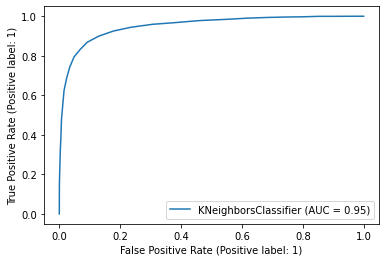

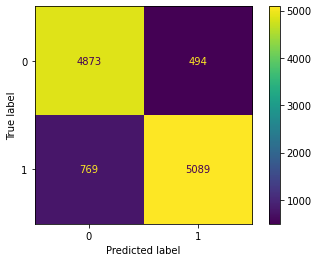

In [27]:
from sklearn.neighbors import KNeighborsClassifier

# KNN model object 
model = KNeighborsClassifier(n_neighbors = 30)

# training the KNN model
model.fit(X_train, y_train)

# Analyzing Model on Training Data
print("\nKNN on Training Data")
binary_classifier_model_analysis_print(X_train.to_numpy(), y_train.to_numpy(), model)

# Analyzing Model on Testing Data
print("\nKNN on Testing Data")
binary_classifier_model_analysis_print(X_test.to_numpy(), y_test.to_numpy(), model)

### Logistic Regression Model


Logistic Regression on Training Data
	Accuracy: 0.9539393579425652
	Error: 0.046060642057434764
	Precision: 0.9623173397767806
	Recall: 0.9491573511887874
	F1 score: 0.9556920439937152


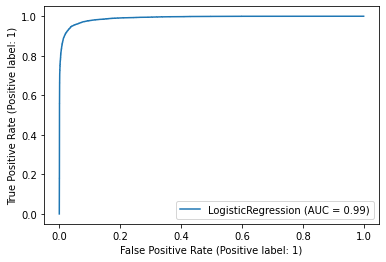

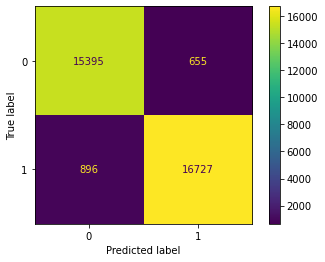


Logistic Regression on Testing Data
	Accuracy: 0.9355902004454343
	Error: 0.06440979955456572
	Precision: 0.9438202247191011
	Recall: 0.9320587231136906
	F1 score: 0.9379026024220561


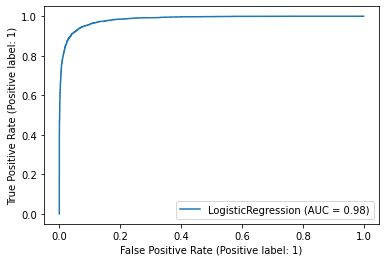

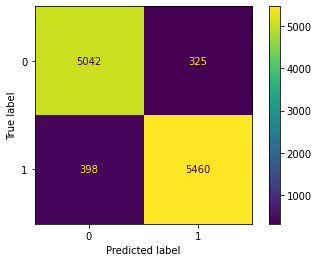

In [31]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression model object 
model = LogisticRegression(random_state=0)

# training the NB model
model.fit(X_train, y_train)

# Analyzing Model on Training Data
print("\nLogistic Regression on Training Data")
binary_classifier_model_analysis_print(X_train.to_numpy(), y_train.to_numpy(), model)

# Analyzing Model on Testing Data
print("\nLogistic Regression on Testing Data")
binary_classifier_model_analysis_print(X_test.to_numpy(), y_test.to_numpy(), model)

### Decision Tree Model (using gini index) 


Decision Tree (Gini Index) on Training Data
	Accuracy: 1.0
	Error: 0.0
	Precision: 1.0
	Recall: 1.0
	F1 score: 1.0


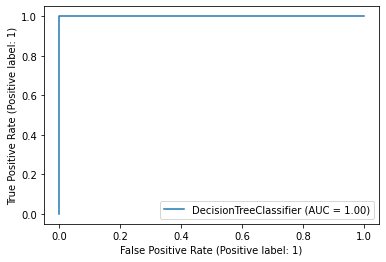

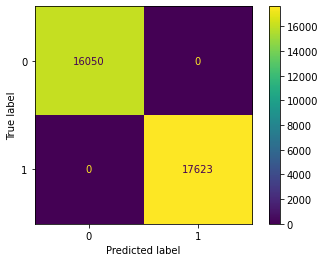


Decision Tree (Gini Index) on Testing Data
	Accuracy: 0.8791982182628062
	Error: 0.1208017817371938
	Precision: 0.8808798646362098
	Recall: 0.8886992147490611
	F1 score: 0.8847722637661455


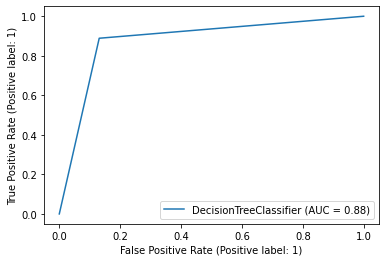

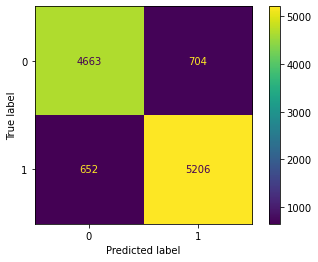

In [32]:
from sklearn.tree import DecisionTreeClassifier

# DT model object 
model = DecisionTreeClassifier(random_state=0)

# training the DT model
model.fit(X_train, y_train)

# Analyzing Model on Training Data
print("\nDecision Tree (Gini Index) on Training Data")
binary_classifier_model_analysis_print(X_train.to_numpy(), y_train.to_numpy(), model)

# Analyzing Model on Testing Data
print("\nDecision Tree (Gini Index) on Testing Data")
binary_classifier_model_analysis_print(X_test.to_numpy(), y_test.to_numpy(), model)


### Decision Tree Model (using IG) 


Decision Tree (IG) on Training Data
	Accuracy: 1.0
	Error: 0.0
	Precision: 1.0
	Recall: 1.0
	F1 score: 1.0


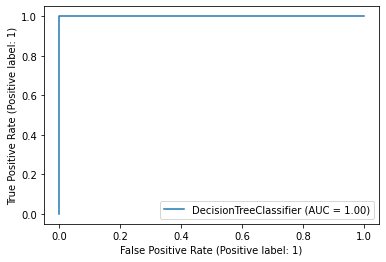

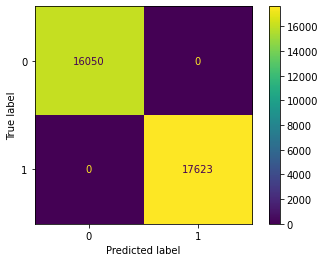


Decision Tree (IG) on Testing Data
	Accuracy: 0.8732293986636971
	Error: 0.1267706013363029
	Precision: 0.874894336432798
	Recall: 0.8834073062478661
	F1 score: 0.8791302131996942


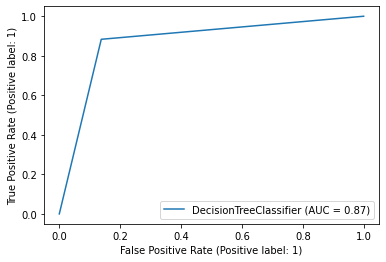

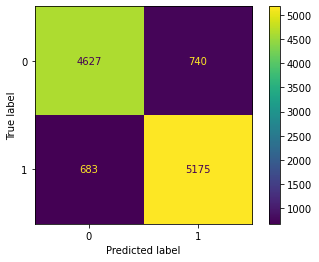

In [33]:
from sklearn.tree import DecisionTreeClassifier

# DT model object 
model = DecisionTreeClassifier(criterion = "entropy", random_state=0)

# training the DT model
model.fit(X_train, y_train)

# Analyzing Model on Training Data
print("\nDecision Tree (IG) on Training Data")
binary_classifier_model_analysis_print(X_train.to_numpy(), y_train.to_numpy(), model)

# Analyzing Model on Testing Data
print("\nDecision Tree (IG) on Testing Data")
binary_classifier_model_analysis_print(X_test.to_numpy(), y_test.to_numpy(), model)


### Random Forest Model (Bagging)


Random Forest on Training Data
	Accuracy: 1.0
	Error: 0.0
	Precision: 1.0
	Recall: 1.0
	F1 score: 1.0


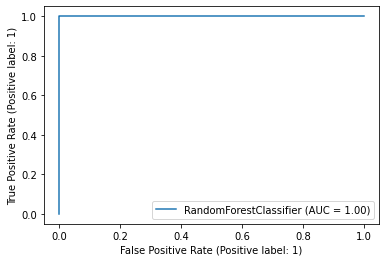

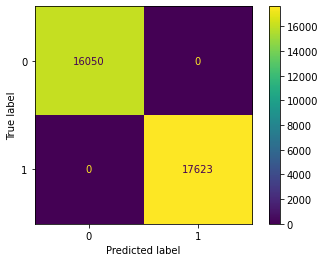


Random Forest on Testing Data
	Accuracy: 0.934075723830735
	Error: 0.065924276169265
	Precision: 0.9542066027689031
	Recall: 0.9177193581427108
	F1 score: 0.9356073790462931


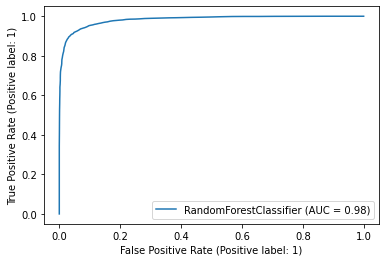

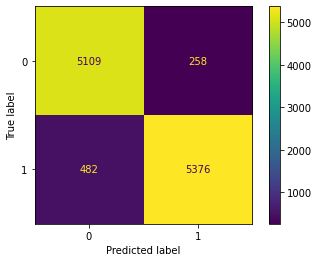

In [42]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest model object 
model = RandomForestClassifier(criterion="gini", random_state=5)

# training the Random Forest model
model.fit(X_train, y_train)

# Analyzing Model on Training Data
print("\nRandom Forest on Training Data")
binary_classifier_model_analysis_print(X_train.to_numpy(), y_train.to_numpy(), model)

# Analyzing Model on Testing Data
print("\nRandom Forest on Testing Data")
binary_classifier_model_analysis_print(X_test.to_numpy(), y_test.to_numpy(), model)

In [45]:
# creating a dataframe for feature importance values
fi_df = pd.DataFrame()

# getting a list of feature importance values
feature_importance = list(model.feature_importances_)

# list of feature names 
feature_names = list(model.feature_names_in_)

# adding to dataframe 
fi_df["feature"] = feature_names
fi_df["importance"] = feature_importance


# sorting features by feature importance
fi_df = fi_df.sort_values(by="importance", ascending=False)

# top 30 most important features
fi_df.iloc[:30]

,feature,importance
3904,text: vehicle,0.062308
1904,title: video,0.059252
3,title sa comp,0.025180
6,text sa neu,0.021194
2838,text: higher,0.015865
3576,text: russian,0.015847
4,text sa neg,0.015111
0,title sa neg,0.014692
1576,title: says,0.014518
2,title sa neu,0.014181


### AdaBoost Model


AdaBoost on Training Data
	Accuracy: 0.8818935051821934
	Error: 0.11810649481780655
	Precision: 0.919257711687354
	Recall: 0.8488906542586393
	F1 score: 0.8826739829483435


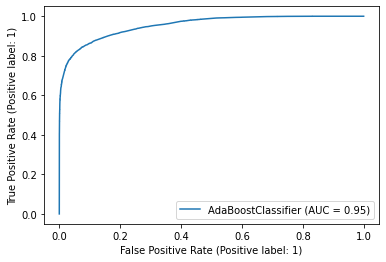

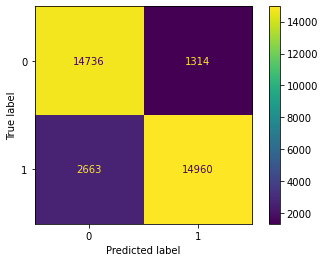


AdaBoost on Testing Data
	Accuracy: 0.8770601336302896
	Error: 0.12293986636971044
	Precision: 0.9150908416759362
	Recall: 0.8426083987709115
	F1 score: 0.8773551368645572


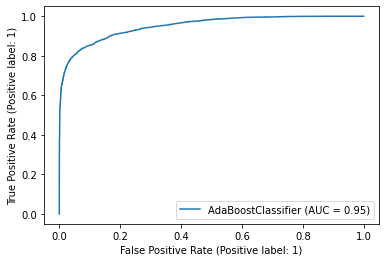

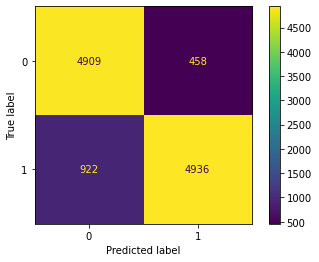

In [36]:
from sklearn.ensemble import AdaBoostClassifier

# AdaBoost model object 
model = AdaBoostClassifier(n_estimators= 100, random_state=0)

# training the AdaBoost model
model.fit(X_train, y_train)

# Analyzing Model on Training Data
print("\nAdaBoost on Training Data")
binary_classifier_model_analysis_print(X_train.to_numpy(), y_train.to_numpy(), model)

# Analyzing Model on Testing Data
print("\nAdaBoost on Testing Data")
binary_classifier_model_analysis_print(X_test.to_numpy(), y_test.to_numpy(), model)

### MLP Classifier Model


MLP Classifier on Training Data
	Accuracy: 0.9999109078490185
	Error: 8.90921509815179e-05
	Precision: 0.9999432527522415
	Recall: 0.9998865119446179
	F1 score: 0.9999148815434814


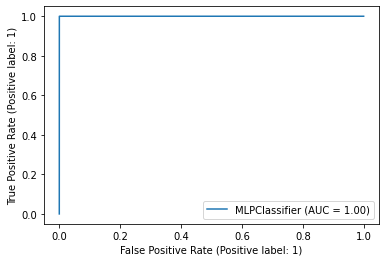

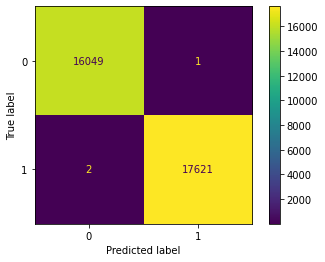


MLP Classifier on Testing Data
	Accuracy: 0.9417371937639198
	Error: 0.058262806236080156
	Precision: 0.9419157608695652
	Recall: 0.9467395015363606
	F1 score: 0.9443214711391111


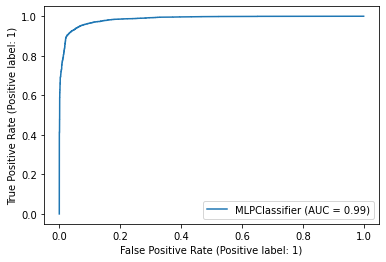

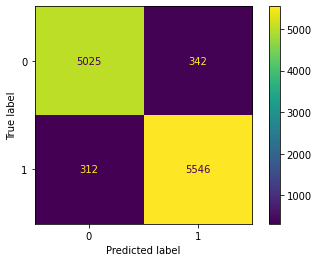

In [37]:
from sklearn.neural_network import MLPClassifier

# MLP Classifier model object 
model = MLPClassifier(random_state=0)

# training the MLP Classifier model
model.fit(X_train, y_train)

# Analyzing Model on Training Data
print("\nMLP Classifier on Training Data")
binary_classifier_model_analysis_print(X_train.to_numpy(), y_train.to_numpy(), model)

# Analyzing Model on Testing Data
print("\nMLP Classifier on Testing Data")
binary_classifier_model_analysis_print(X_test.to_numpy(), y_test.to_numpy(), model)